<a href="https://colab.research.google.com/github/MariuszGrecki/Machine_learning_tutorial/blob/main/classification/08_classification_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Klasyfikacja Ocena modeli

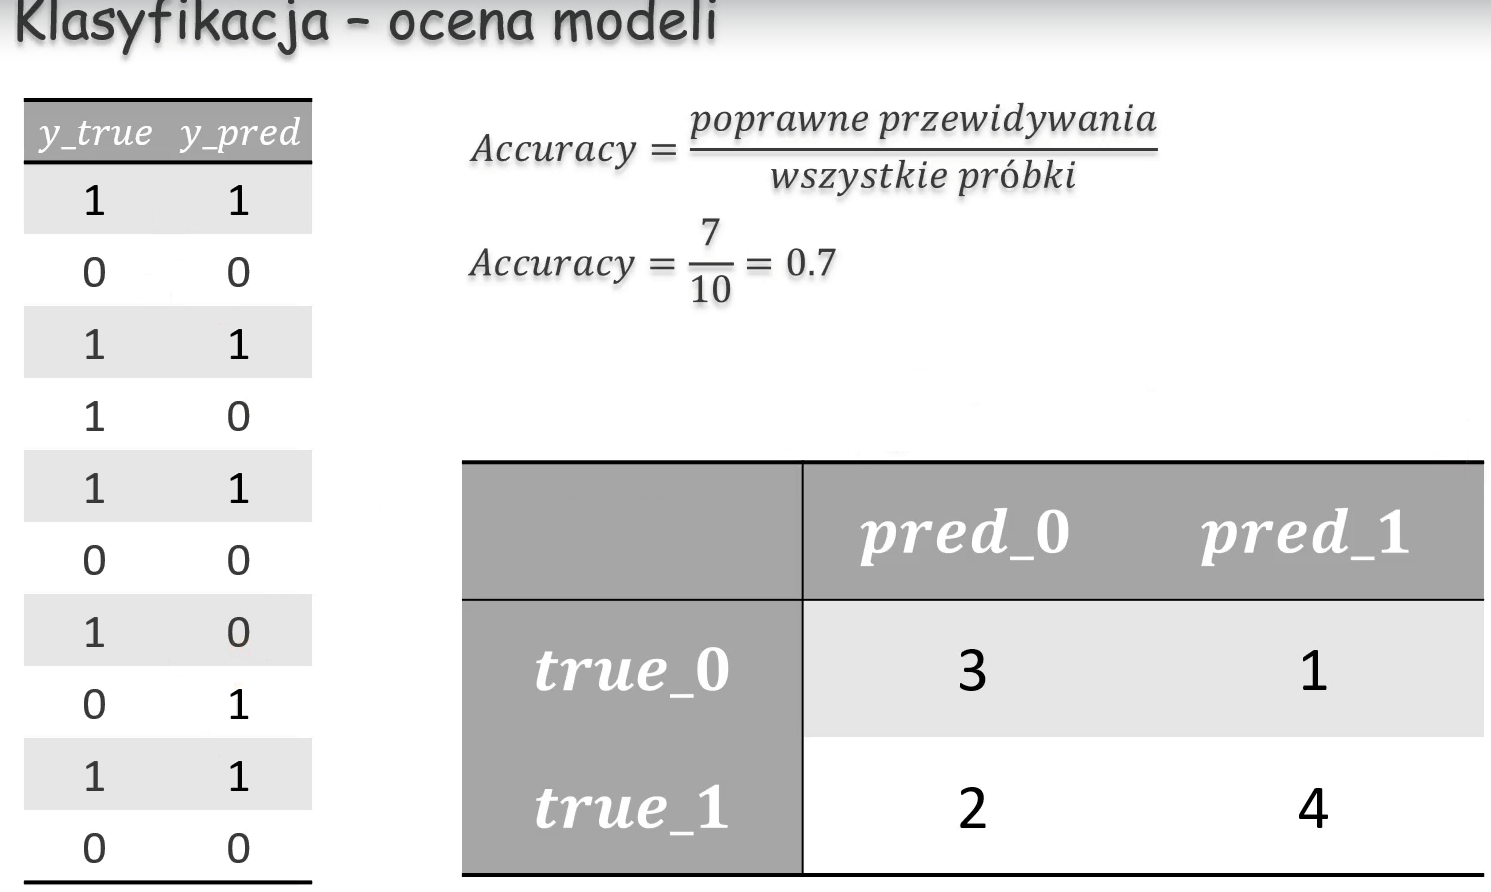

TN - true negative

FP - false positive

FN - false negative

TP - true positive

FPR - procent przypadków do którego zdarzenia nie doszło a my je przewidzieliśmy

FNR - procent przypadków kiedy do zdarzenia doszło a my go nie przewidzieliśmy => ważniejszy błąd

Precision - precyzja jaki procent operacji przewidziaanych jako pozytywne są w rzeczywistości pozytywne

Recall - ile obserwacji z wszystkich pozytywnych sklasyfikowalismy jako pozytywne

F1 score - srednia harmoniczna precyzji i recall



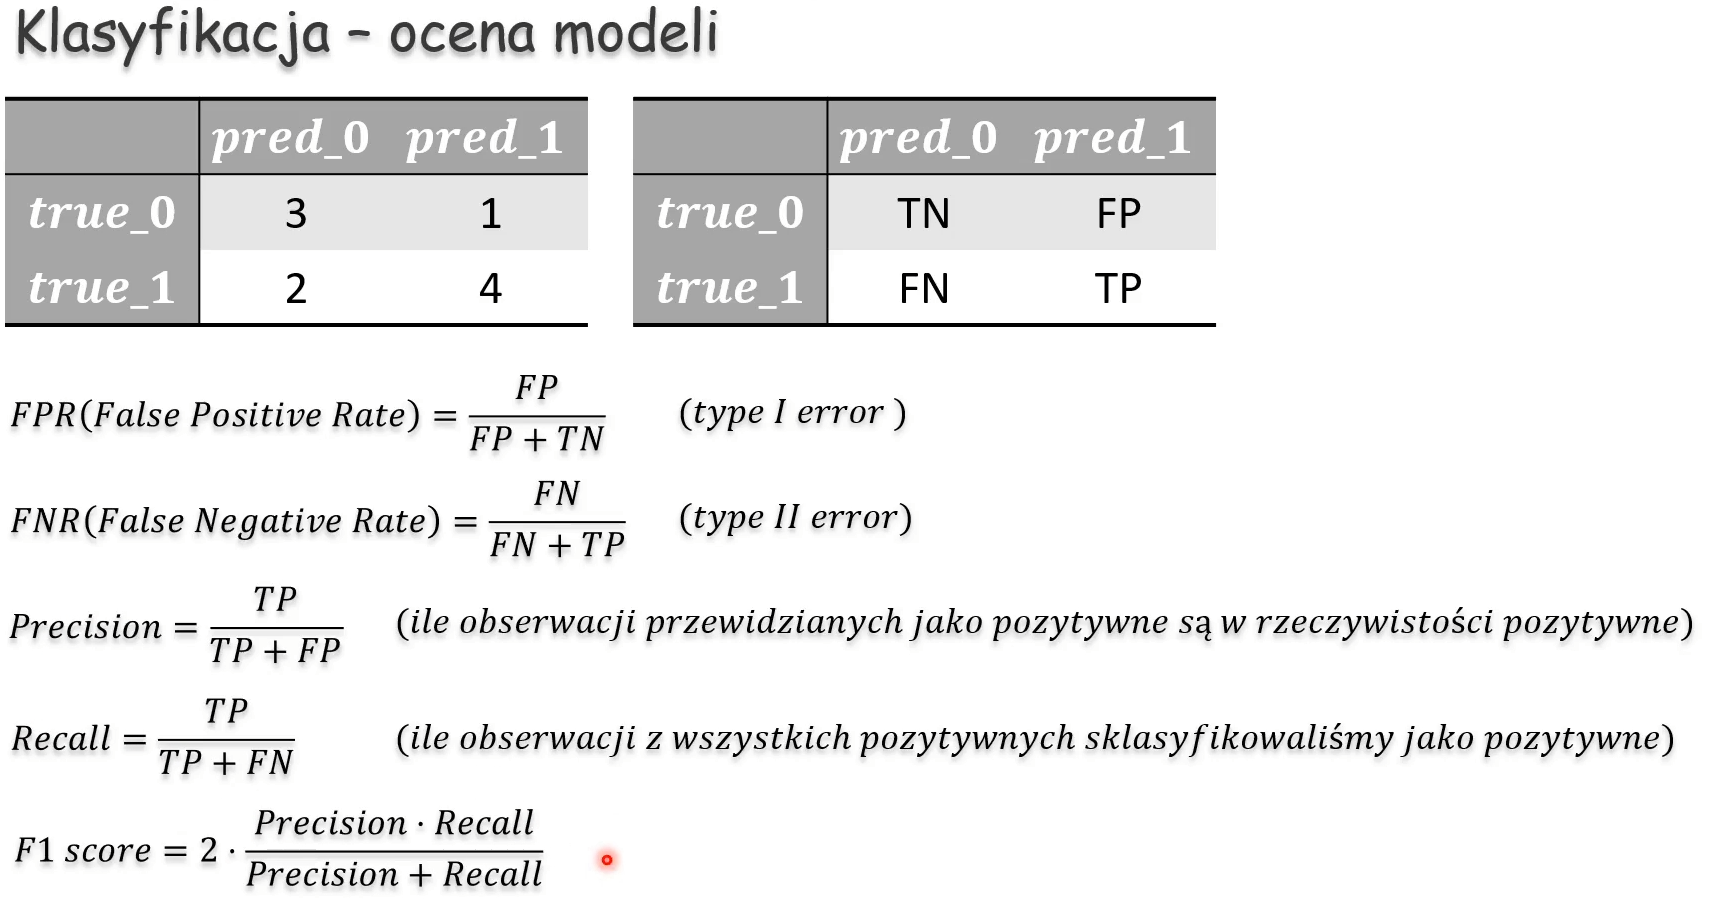

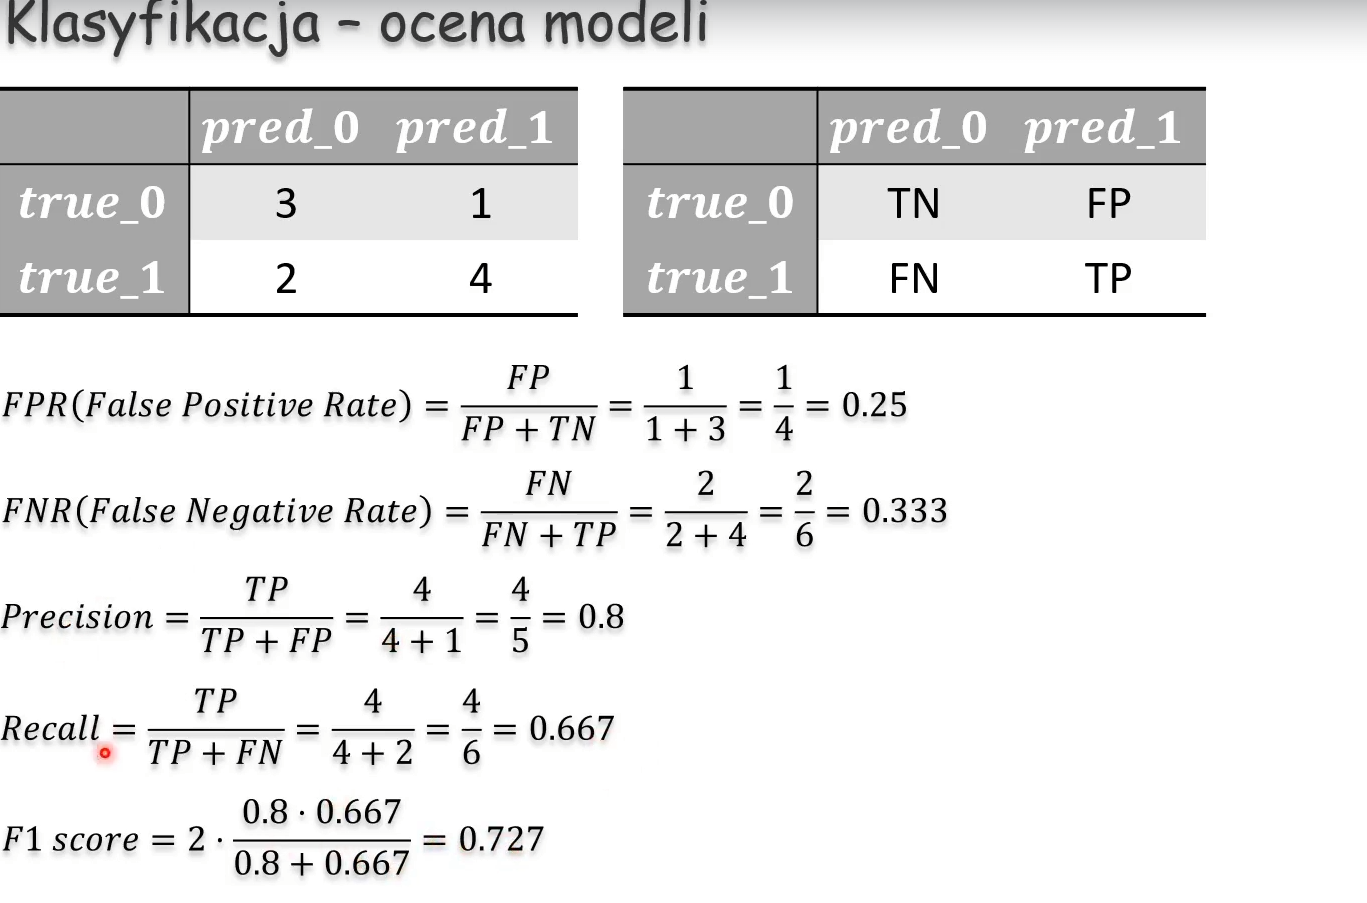

# Macierz konfuzji mozemy przestawić równiez graficznie

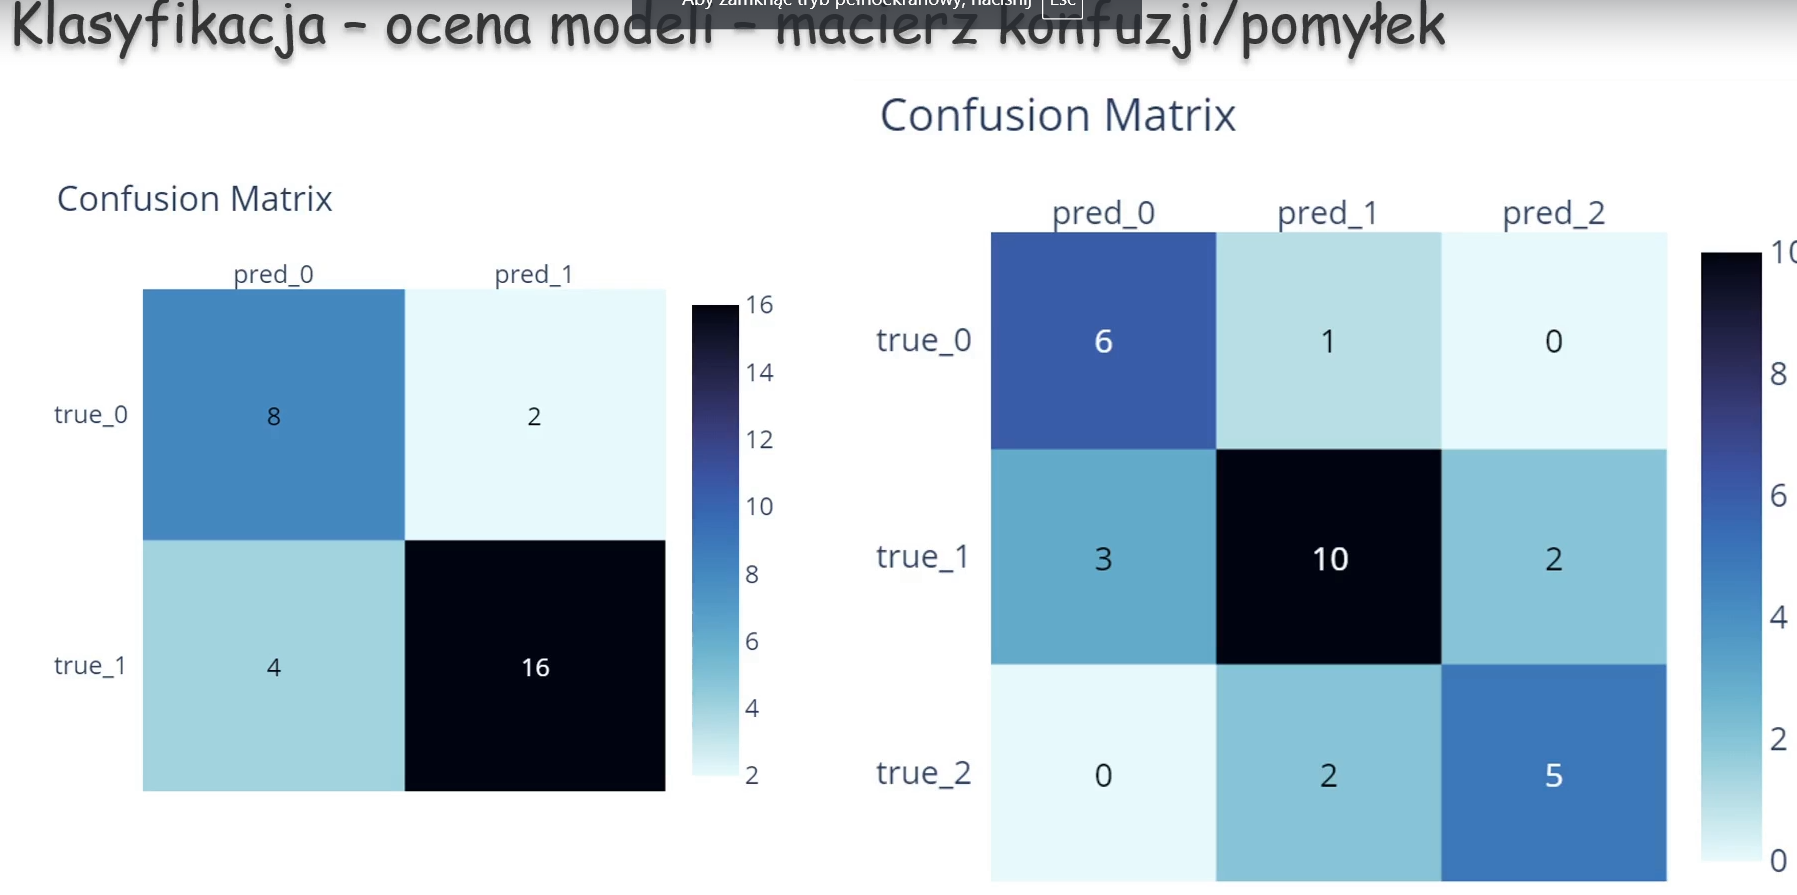

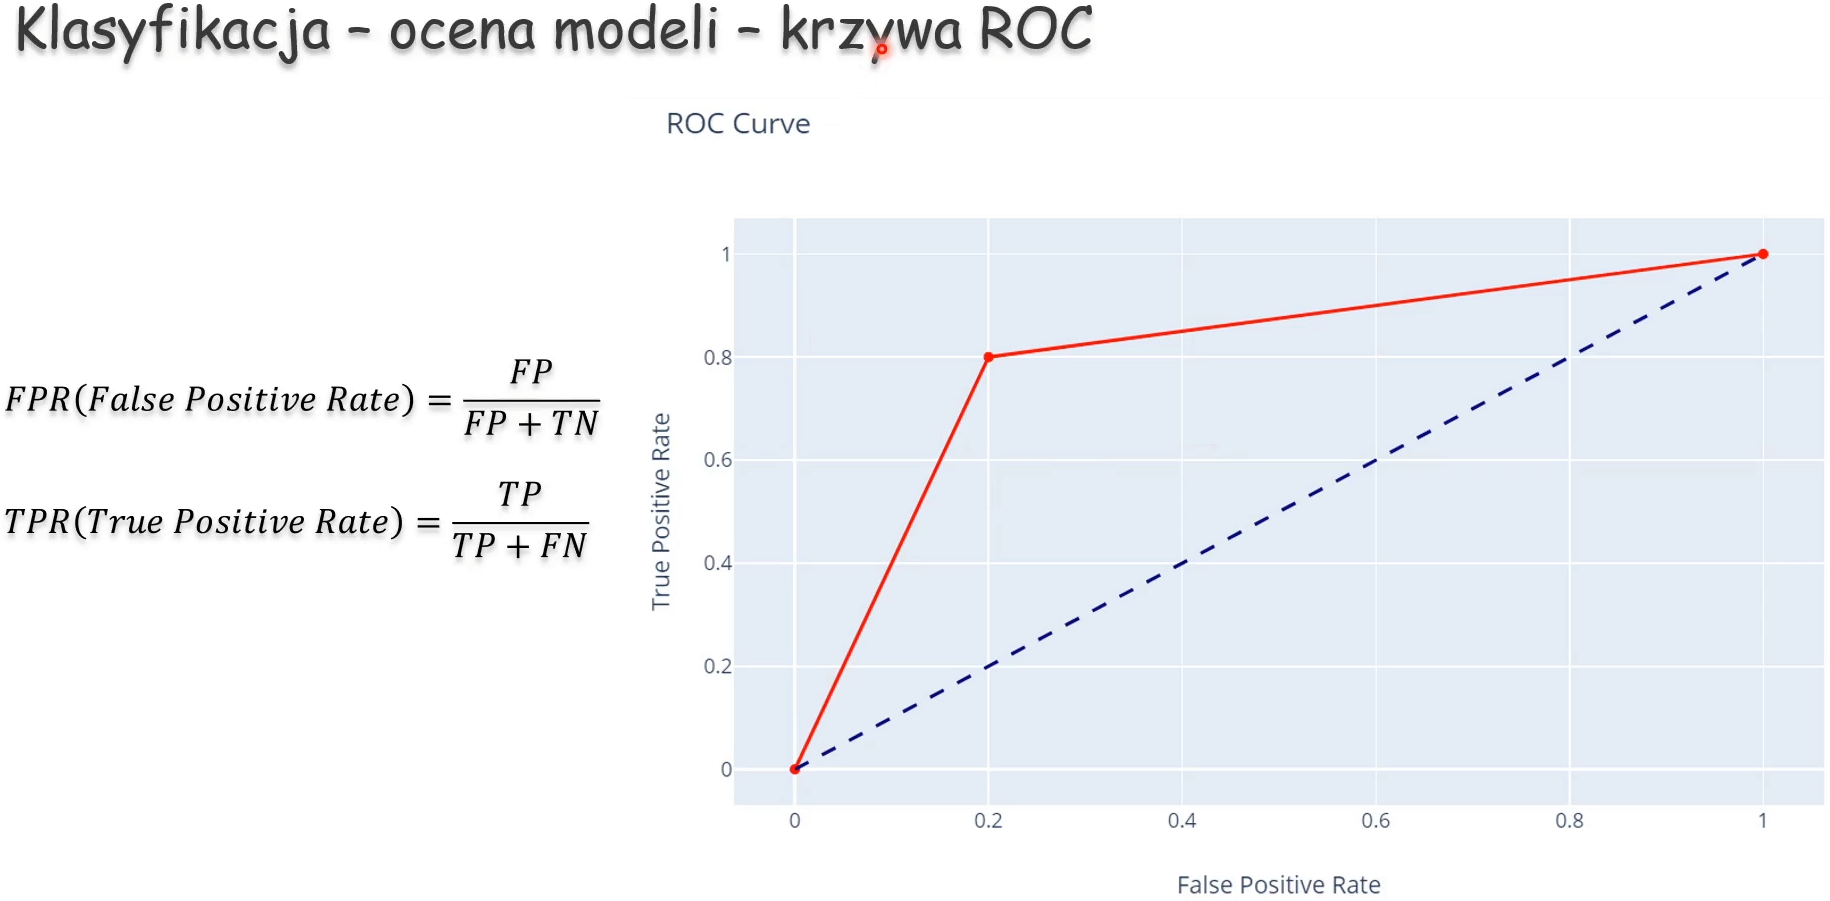

In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

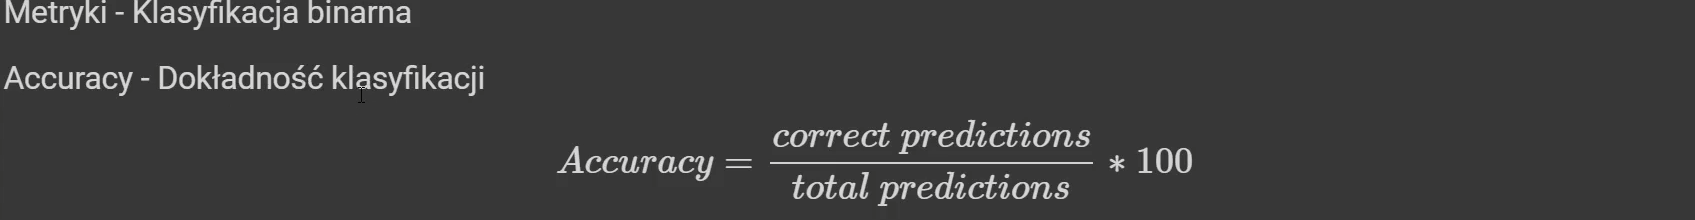

In [2]:
y_true = np.array([1,0,1,1,0,1,1,0,1,0,1,1,0,1,1,0,1,1,0,1,1,1,0,1,1,0,1,1,0,1])
y_pred = np.array([0,0,1,1,0,1,0,0,1,1,0,1,0,1,1,0,0,1,0,1,1,1,1,1,1,0,1,1,0,1])

In [3]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

0.8

In [4]:
results = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred})
results

,y_true,y_pred
0,1,0
1,0,0
2,1,1
3,1,1
4,0,0
5,1,1
6,1,0
7,0,0
8,1,1
9,0,1


In [5]:
results = results.sort_values(by='y_true') #sortowamoe
results = results.reset_index(drop=True)
results['sample'] = results.index + 1 #dodanie kolumny sample
results

,y_true,y_pred,sample
0,0,0,1
1,0,0,2
2,0,0,3
3,0,0,4
4,0,0,5
5,0,0,6
6,0,0,7
7,0,0,8
8,0,1,9
9,0,1,10


In [6]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(x=results['sample'], y=results['y_true'], mode='markers', name='y_true'), row=1, col=1)
fig.add_trace(go.Scatter(x=results['sample'], y=results['y_pred'], mode='markers', name='y_pred'), row=2, col=1)
fig.update_layout(width=1000, height=800, title='Klasyfikator binarny')
fig.show()

# Maciesz konfuzji/pomyłek

In [7]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)
cm

array([[ 8,  2],
       [ 4, 16]])

In [9]:
import plotly.figure_factory as ff

def plot_confusion_matrix(cm):
  cm = cm[::-1]
  cm = pd.DataFrame(cm, columns=['pred_0', 'pred_1'], index=['true_1', 'true_0'])

  fig = ff.create_annotated_heatmap(z=cm.values, x=list(cm.columns), y=list(cm.index), colorscale='ice', showscale=True, reversescale=True)
  fig.update_layout(width=500, height=500, title='Confusion Matrix', font_size=16)
  fig.show()

plot_confusion_matrix(cm)

In [ ]:
#u góry zalezy nam aby wartości po przekątnej  w tym przypadku 8 i 16 było jak największe


In [10]:
cm = confusion_matrix(y_true, y_pred)
cm_df = pd.DataFrame(cm, columns=['pred_0', 'pred_1'], index=['true_0', 'true_1'])
cm_df

,pred_0,pred_1
true_0,8,2
true_1,4,16


In [12]:
tn, fp, fn, tp = cm.ravel()
print(f'TN - True negative: {tn}')
print(f'FP - False Positive: {fp}')
print(f'FN - False Negative: {fn}')
print(f'TP - True Positive: {tp}')

TN - True negative: 8
FP - False Positive: 2
FN - False Negative: 4
TP - True Positive: 16


In [13]:
#False Positive Rate - Type I error
fpr = fp / (fp + tn)
print(fpr)

0.2


In [14]:
#False Negative Rate - Type II error
fnr = fn / (fn + tp)
print(fnr)

0.2


In [15]:
#precision

precision = tp / (tp + fp)
print(precision)

0.8888888888888888


In [16]:
#recall

recall = tp / (tp + fn)
print(recall)

0.8


In [17]:
#raport klasyfikacji

from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.80      0.73        10
           1       0.89      0.80      0.84        20

    accuracy                           0.80        30
   macro avg       0.78      0.80      0.78        30
weighted avg       0.81      0.80      0.80        30



In [18]:
from sklearn.metrics import roc_curve

fpr, tpr, tresh = roc_curve(y_true, y_pred, pos_label=1)
roc = pd.DataFrame({'fpr': fpr, 'tpr': tpr})
roc

,fpr,tpr
0,0.0,0.0
1,0.2,0.8
2,1.0,1.0


In [24]:
def plot_roc_curve(y_true, y_pred):
  #Binary classification
  from sklearn.metrics import roc_curve
  fpr, tpr, tresh = roc_curve(y_true, y_pred, pos_label=1)

  fig = go.Figure(
      data = [
          go.Scatter(x=roc['fpr'], y=roc['tpr'],
                     line_color='red',
                     name='ROC Curve'),
          go.Scatter(x=[0,1], y=[0,1],
                     mode='lines',
                     line_dash='dash',
                     line_color='navy')
      ],

      layout=go.Layout(xaxis_title='False Positive Rate',
                       yaxis_title='True Positive Rate',
                       title='Roc Curve',
                       showlegend=False,
                       width=800))

  fig.show()

plot_roc_curve(y_true, y_pred)

**pogrubiony tekst**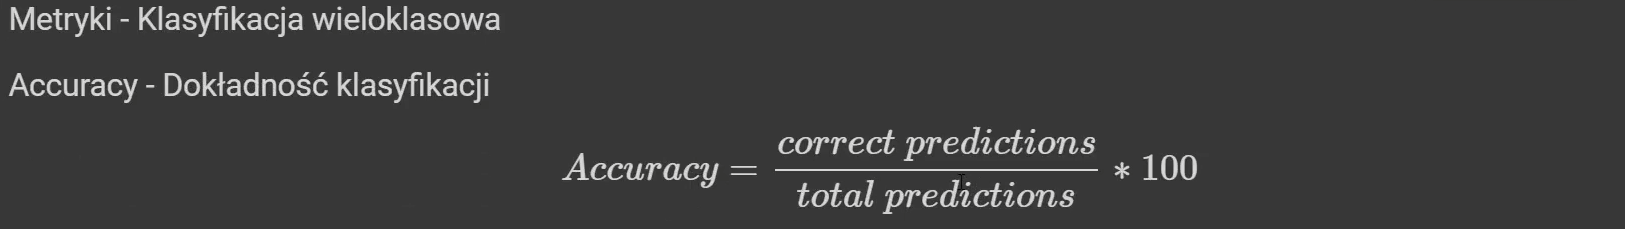

In [25]:
y_true = np.array([1,0,1,2,0,1,1,0,1,0,1,1,0,2,1,1,2,2,0,1,1,1,0,1,1,2,1,1,2,2])
y_pred = np.array([0,0,1,2,0,1,0,0,1,1,0,1,0,2,1,2,0,2,0,1,2,1,1,1,1,1,1,1,2,2])

from sklearn.metrics import accuracy_score

accuracy_score(y_true, y_pred)

0.7

In [28]:
#maciesz konfuzji/pomyłek
cm = confusion_matrix(y_true, y_pred)
cm

array([[ 5,  2,  0],
       [ 3, 11,  2],
       [ 1,  1,  5]])

In [30]:
def plot_confusion_matrix(cm):
  cm = cm[::-1]
  cm = pd.DataFrame(cm, columns=['pred_0', 'pred_1', 'pred_2'], index=['true_2', 'true_1', 'true_0'])

  fig = ff.create_annotated_heatmap(z=cm.values, x=list(cm.columns), y=list(cm.index), colorscale='ice', showscale=True, reversescale=True)
  fig.update_layout(width=500, height=500, title='Confusion Matrix', font_size=16)
  fig.show()

plot_confusion_matrix(cm)

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.71      0.63         7
           1       0.79      0.69      0.73        16
           2       0.71      0.71      0.71         7

    accuracy                           0.70        30
   macro avg       0.69      0.71      0.69        30
weighted avg       0.72      0.70      0.70        30



In [32]:
print(classification_report(y_true, y_pred, target_names=['label_1', 'label_2', 'label_3']))

              precision    recall  f1-score   support

     label_1       0.56      0.71      0.63         7
     label_2       0.79      0.69      0.73        16
     label_3       0.71      0.71      0.71         7

    accuracy                           0.70        30
   macro avg       0.69      0.71      0.69        30
weighted avg       0.72      0.70      0.70        30

